<a href="https://colab.research.google.com/github/prasadsawant7/ML_Algorithms/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_csv('Mall_Customers.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [106]:
print(df.isnull().sum())

df = df.fillna(df.mean())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [107]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,0.019231,0.000000,0.387755
1,2,0,0.057692,0.000000,0.816327
2,3,1,0.038462,0.008197,0.051020
3,4,1,0.096154,0.008197,0.775510
4,5,1,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,1,0.326923,0.860656,0.795918
196,197,1,0.519231,0.909836,0.275510
197,198,0,0.269231,0.909836,0.744898
198,199,0,0.269231,1.000000,0.173469


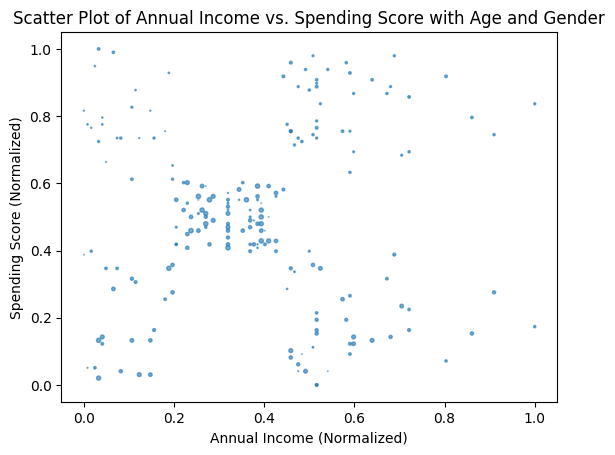

In [108]:
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
age = df['Age']
gender = df['Gender']

plt.scatter(x, y, s=age*10, alpha=0.6)
plt.xlabel('Annual Income (Normalized)')
plt.ylabel('Spending Score (Normalized)')
plt.title('Scatter Plot of Annual Income vs. Spending Score with Age and Gender')

plt.show()

Silhouette Score: 0.22286680009809715
Inertia: 17.370109472896694


Text(0, 0.5, 'Spending Score (1-100)')

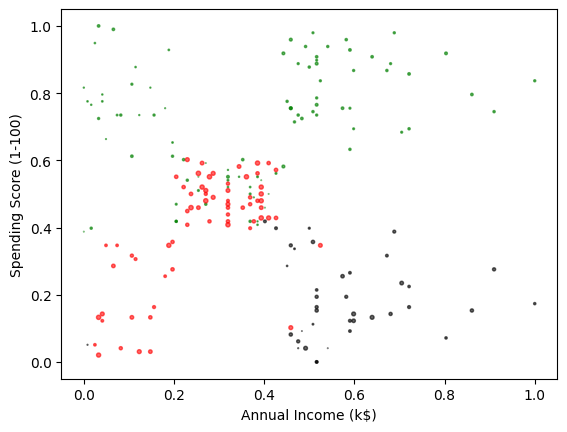

In [109]:
km = KMeans(n_clusters=3)
km.n_init = 10
y_predicted = km.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['cluster'] = y_predicted

silhouette_avg = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], y_predicted)
print("Silhouette Score:", silhouette_avg)

inertia = km.inertia_
print("Inertia:", inertia)

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

[23.04072032603991, 13.993505283127973, 9.058985215159453, 6.110312266413656, 3.5831179059525606, 3.098385141882586, 2.6247437662801323, 2.2179318805882096, 1.9840116756618373]


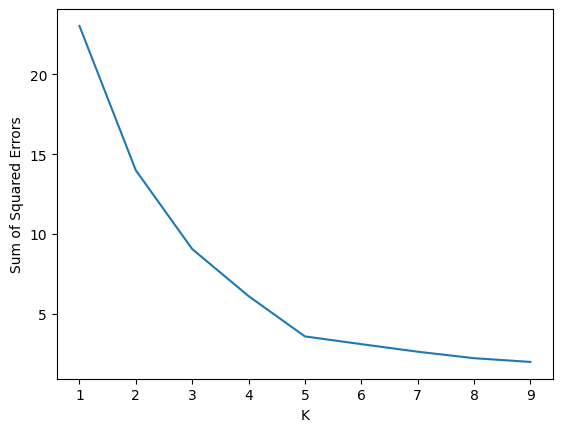

In [110]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.n_init = 10
  km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  sse.append(km.inertia_)

print(sse)

plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)

Silhouette Score: 0.5594854531227246
Inertia: 3.5831179059525606


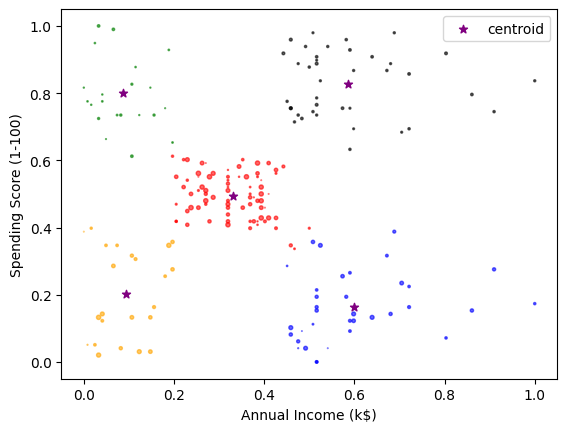

In [111]:
km = KMeans(n_clusters=5)
km.n_init = 10
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['cluster'] = y_predicted

silhouette_avg = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], y_predicted)
print("Silhouette Score:", silhouette_avg)

inertia = km.inertia_
print("Inertia:", inertia)

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='blue', s=df4['Age']*10, alpha=0.6)
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='orange', s=df5['Age']*10, alpha=0.6)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

**Strengths of K-means algorithm in the context of the Mall Customers dataset:**

1. Interpretability: K-means provides interpretable results as the clusters are represented by their centroids. In the case of the Mall Customers dataset, the algorithm can identify distinct groups of customers based on their annual income and spending score. This can help in understanding customer segmentation and making targeted marketing strategies.

2. Scalability: K-means is computationally efficient and can handle large datasets with a reasonable number of clusters. The Mall Customers dataset may contain a significant number of records, and K-means can efficiently process and cluster the data.

3. Speed: K-means is a fast algorithm, making it suitable for large-scale applications. With a relatively low-dimensional dataset like Mall Customers, K-means can quickly converge and provide clustering results in a timely manner.

4. Flexibility in cluster assignment: K-means assigns each data point to only one cluster, allowing for clear separation of customers into distinct groups based on their spending behavior. This can assist in targeted marketing campaigns tailored to specific customer segments.


**Limitations of K-means algorithm in the context of the Mall Customers dataset:**

1. Determining the number of clusters (K): Selecting the optimal value of K is crucial for effective clustering. In the case of the Mall Customers dataset, determining the appropriate number of customer segments may require additional analysis and domain knowledge. An incorrect choice of K could lead to suboptimal clustering results.

2. Sensitivity to initial centroid selection: K-means is sensitive to the initial placement of centroids. Depending on the initial configuration, the algorithm may converge to different solutions. Multiple runs with different initializations can be used to mitigate this issue, but it increases computational complexity.

3. Assumption of equal variance and circular clusters: K-means assumes that clusters have the same variance and are circular in shape. This assumption may not hold for the Mall Customers dataset, as different customer segments may have varying spending behaviors and income distributions. Non-circular or non-convex clusters in the data may lead to suboptimal clustering results.

4. Handling outliers: K-means can be affected by the presence of outliers, such as customers with exceptionally high or low spending scores. Outliers can influence the position of centroids, leading to inaccurate cluster assignments.

5. Limitations with categorical variables: K-means is a distance-based algorithm and works best with numerical variables. In the Mall Customers dataset, if categorical variables like gender are included, a suitable transformation or alternative clustering algorithm may be required to handle them effectively.

In conclusion, while the K-means algorithm has strengths in interpretability, scalability, and speed, it is important to consider its limitations, particularly in determining the number of clusters and assumptions about the data's distribution and shape. These limitations should be taken into account when analyzing the Mall Customers dataset and making decisions based on the clustering results.

Silhouette Score: 0.5594854531227246
Inertia: 3.5831179059525606


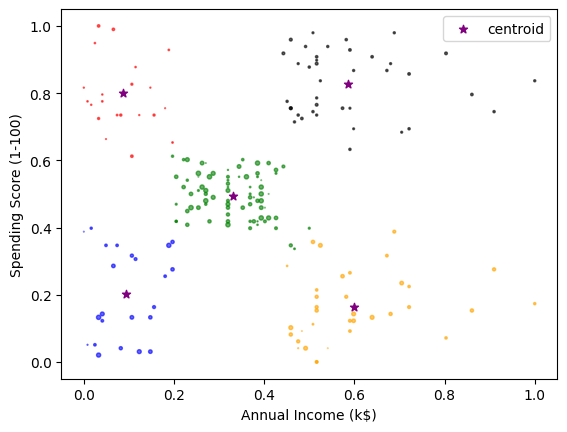

In [112]:
# Random Initialization

km = KMeans(n_clusters=5, init="random")
km.n_init = 10
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['cluster'] = y_predicted

silhouette_avg = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], y_predicted)
print("Silhouette Score:", silhouette_avg)

inertia = km.inertia_
print("Inertia:", inertia)

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='blue', s=df4['Age']*10, alpha=0.6)
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='orange', s=df5['Age']*10, alpha=0.6)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

Silhouette Score: 0.5594854531227246
Inertia: 3.5831179059525606


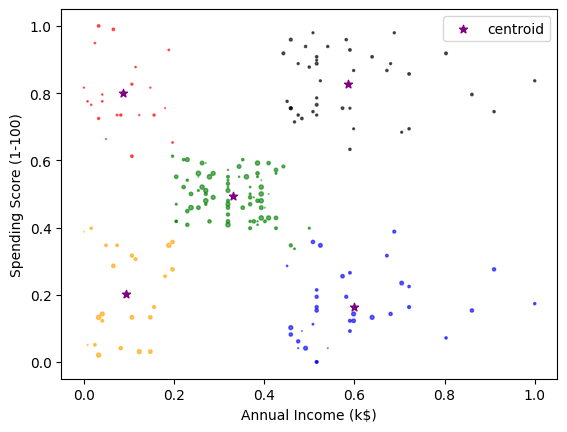

In [113]:
# KMeans++

km = KMeans(n_clusters=5, init='k-means++')
km.n_init = 10
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['cluster'] = y_predicted

silhouette_avg = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], y_predicted)
print("Silhouette Score:", silhouette_avg)

inertia = km.inertia_
print("Inertia:", inertia)

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='blue', s=df4['Age']*10, alpha=0.6)
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='orange', s=df5['Age']*10, alpha=0.6)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
df = pd.read_csv('Mall_Customers.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
age = df['Age']
gender = df['Gender']

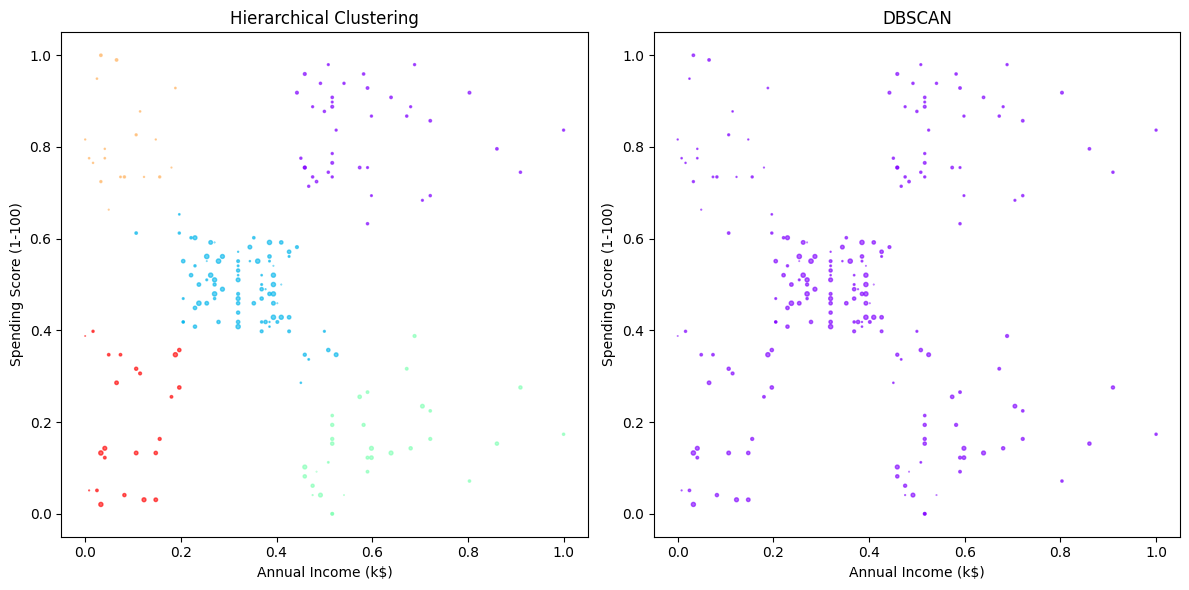

In [116]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
h_labels = hierarchical.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Visualize Hierarchical Clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y, s=age*10, alpha=0.6, c=h_labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
d_labels = dbscan.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Visualize DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(x, y, s=age*10, alpha=0.6, c=d_labels, cmap='rainbow')
plt.title('DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()